BASC0038 Algorithms, Logic and Structure

# Week 3: Mergesort

Author: Sam J. Griffiths (sam.griffiths.19@ucl.ac.uk)

---

# Merging lists

So far, we have looked at a number of different straightforward algorithms to sort lists of elements, which run in polynomial &ndash; usually quadratic &ndash; time. We found that insertion sort is generally a favoured simple approach to sorting lists. However, there are a wide range of sorting algorithms yet to study which run in better than polynomial time. These algorithms will start to use a crucial principle known as *divide-and-conquer*: to solve a problem, try dividing it into smaller non-overlapping problems and conquer it by combining those (easier) solutions.

Let us begin a divide-and-conquer approach to sorting by first considering a different problem: merging lists. Take two arbitrary lists of numbers $A$ and $B$. How do we merge the lists? A valid answer to this question would be to just append all of the elements of $B$ to those in $A$:

In [1]:
a = [6, 2, 25, 8, 10]
b = [3, 7, -3, 89, 0, 4]
result = a.copy() + b.copy()
print(result)

[6, 2, 25, 8, 10, 3, 7, -3, 89, 0, 4]


A more involved question would be that, if $A$ and $B$ are *already sorted*, how do we merge them as $C$ such that the ordering is preserved?

For example, take two sorted lists:

| $A$ | $B$ |
| :-: | :-: |
| $2, 6, 8, 10, 25$ | $7, 9, 30, 50, 100$ |

We begin with an index $i$ to the first element in $A$ and another $j$ likewise to the first element in $B$. Comparing $i$ and $j$ gives us a comparison between $2$ and $7$. $2$ is smaller, so it is appended to the result and $i$ is incremented, meaning the next comparison is between $6$ and $7$. This proceeds as follows until either of the lists is exhausted, at which point all remaining elements from the other are merely appended:

| $A$ | $B$ | $C$ |
| -: | -: | :- |
| $6, 8, 10, 25$ | $7, 9, 30, 50, 100$ | $2$ |
| $8, 10, 25$ | $7, 9, 30, 50, 100$ | $2, 6$ |
| $8, 10, 25$ | $9, 30, 50, 100$ | $2, 6, 7$ |
| $10, 25$ | $9, 30, 50, 100$ | $2, 6, 7, 8$ |
| $10, 25$ | $30, 50, 100$ | $2, 6, 7, 8, 9$ |
| $25$ | $30, 50, 100$ | $2, 6, 7, 8, 9, 10$ |
| | $30, 50, 100$ | $2, 6, 7, 8, 9, 10, 25$ |
| | | $2, 6, 7, 8, 9, 10, 25, 30, 50, 100$ |

How many comparisons does this take? Let's assume for simplicity that the total number of elements is $n$, split equally into $A$ and $B$. In the best case, all of the elements in one list are less than all of the elements than the other; in this case, one of the indices never needs to be incremented until a list becomes exhausted. Then, $n/2$ comparisons are needed. In the worst case, all of the elements are perfectly interleaved such that elements are selected alternately from the left and right sets. Then, $n-1$ comparisons are needed.

Therefore, merging two sorted lists of total length $n$ can be performed in $O(n)$ comparisons. This linear-time merging is the basis of *mergesort*: a divide-and-conquer approach to sorting a single list from scratch.

# Sorting by merging

Take an arbitrary, hypothetical comparison sort (like selection or insertion sort) called *wholesort* which sorts a whole set of size $n$ in a number of comparisons varying with $n$ as

\begin{align}
T(n) &= n^2 \\
\therefore \quad T(n) &= O(n^2)
\end{align}

Let us define a new algorithm called *halfsort*, which splits the input set into two equal halves, sorts them each using wholesort, then merges them in linear time. The running time of this approach is

\begin{align}
T(n) &= 2\left(\frac{n}{2}\right)^2 + n \\
&= \frac{1}{2}n^2 + n \\
\therefore \quad T(n) &= O(n^2)
\end{align}

Even though halfsort is quadratic-time, as with the original wholesort, the actual terms in the running time mean that it grows more slowly than that of wholesort for sufficiently large $n$:

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

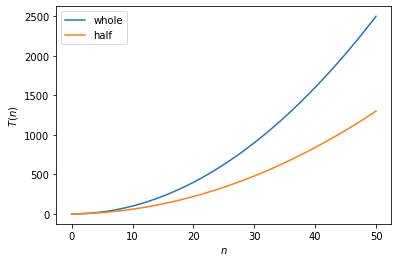

In [3]:
x = np.linspace(0, 50, 101)
plt.plot(x, [(x**2) for x in x], label="whole")
plt.plot(x, [(0.5 * x**2 + x) for x in x], label="half")
plt.legend()
plt.xlabel(r"$n$")
plt.ylabel(r"$T(n)$")
plt.show()

In that case, can we improve it further? Let us define *quartersort*, which similarly halves its input, performs halfsort on those two halves, then merges in linear time:

\begin{align}
T(n) &= 2\left( 2\left(\frac{n}{4}\right)^2 + \frac{n}{2} \right) + n \\
&= \frac{1}{4}n^2 + 2n \\
\end{align}

We can see that the constant factor in front of the $n^2$ has been reduced further. Therefore, this grows more slowly still:

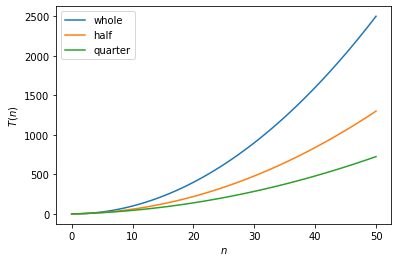

In [4]:
x = np.linspace(0, 50, 101)
plt.plot(x, [(x**2) for x in x], label="whole")
plt.plot(x, [(0.5 * x**2 + x) for x in x], label="half")
plt.plot(x, [(0.25 * x**2 + 2 * x) for x in x], label="quarter")
plt.legend()
plt.xlabel(r"$n$")
plt.ylabel(r"$T(n)$")
plt.show()

Following this down as far as possible would mean discarding the original comparison sort entirely, recursively performing halfsort until the base case of single elements (sets of size 1), repeatedly merged back up to culminate in the sorted set. This is what is known as the *mergesort* algorithm.

# Complexity analysis

## General case
A step (iteration/recursion) of mergesort on a set of size $n$ comprises the same step performed on two halves, followed by merging the two halves in linear time:

\begin{equation}
T(n) = 2T{\left(\frac{n}{2}\right)} + O(n)
\end{equation}

As we will see, the worst and best case for mergesort are very similar, differing only in the exact number of comparisons needed in the $O(n)$ merge step.

## Worst case
In the worst case of merging two sets of combined size $n$, the elements will be perfectly interleaved in terms of their prior ordering, such that elements are selected alternately from the left and right sets. Therefore, $n-1$ comparisons are required.

We can resolve this recurrence relation very similarly to our complexity analysis of binary search, by expanding it out and simplifying by using $k$ as the number of steps:

\begin{align}
T(n) &= 2T{\left(\frac{n}{2}\right)} + n-1 \\
&= 2\left(2T{\left(\frac{n}{4}\right)} + \frac{n}{2} - 1\right) + n-1 \\
&= 4T{\left(\frac{n}{4}\right)} + n-2 + n-1 \\
&= 4\left(2T{\left(\frac{n}{8}\right)} + \frac{n}{4} - 1\right) + n-2 + n-1 \\
&= 8T{\left(\frac{n}{8}\right)} + n-4 + n-2 + n-1 \\
&\;\;\vdots \\
&= 2^k T{\left(\frac{n}{2^k}\right)} + kn - (2^0 + 2^1 + \dots + 2^{k-1})
\end{align}

Note that $(2^0 + 2^1 + \dots + 2^{k-1})$ is a geometric series, but specifically summing powers of two, with a useful result of $2^k-1$ (e.g. $1+2+4+8=15=16-1$). Therefore:

\begin{align}
T(n) = 2^k T{\left(\frac{n}{2^k}\right)} + kn - 2^k + 1
\end{align}

The base case is a set of size 1, achieved after halving the set $k$ times:

\begin{align}
\frac{n}{2^k} &= 1 \\
\implies \quad k &= \log_2{n}
\end{align}

Substituting this back in gives

\begin{align}
T(n) = nT(1) + n\log_2{n} - n + 1
\end{align}

A set of size 1 requires 0 comparisons to sort, so $T(1)=0$:

\begin{align}
T(n) &= n\log_2{n} - n + 1 \\
\therefore \quad T(n) &= O(n\log{n})
\end{align}

By utilising divide-and-conquer, mergesort improves on the quadratic $O(n^2)$ time complexity of selection sort, insertion sort etc. to a linearithmic $O(n\log{n})$ complexity.

## Best case
In the best case of merging two sets of combined size $n$, all of the elements in one set are less than all of the elements in the other. In this case, only $n/2$ comparisons are required:

\begin{align}
T(n) &= 2T{\left(\frac{n}{2}\right)} + \frac{n}{2} \\
&= 4T{\left(\frac{n}{4}\right)} + \frac{n}{2} + \frac{n}{2} \\
&= 8T{\left(\frac{n}{8}\right)} + \frac{n}{2} + \frac{n}{2} + \frac{n}{2} \\
&\;\;\vdots \\
&= 2^kT{\left(\frac{n}{2^k}\right)} + \frac{kn}{2} \\
\frac{n}{2^k} &= 1 \\
\implies \quad k &= \log_2{n} \\
\implies \quad T(n) &= nT(1) + \frac{n\log_2{n}}{2} \\
&= \frac{1}{2}n\log_2{n} \\
\therefore \quad T(n) &= O(n\log{n})
\end{align}

We can see that mergesort runs in $O(n\log{n})$ in both the best and worst case. Thus, the average case can also be trivially stated as $O(n\log{n})$.

NB: Note that this is an approximation by assuming $n$ to be a power of 2. In the general case, an odd $n$ must instead split into sets of unequal size:

\begin{equation}
T(n) = T{\left( \left\lfloor\frac{n}{2}\right\rfloor \right)} + T{\left( \left\lceil\frac{n}{2}\right\rceil \right)} + O(n)
\end{equation}

It is infeasible to solve this recurrence via telescoping. Instead, recall that there are always $\lfloor\log_2{n}+1\rfloor$ levels in a binary tree with $n$ nodes. Using the expression already derived above, this gives us a worst case of

\begin{align}
T(n) &= kn - 2^k + 1 \\
&= n\lfloor\log_2{n}+1\rfloor - 2^{\lfloor\log_2{n}+1\rfloor} + 1
\end{align}

# ✍️ Exercise: Recursive (top-down) mergesort

First, implement an (iterative) merge function as `merge`, which takes two lists `a` and `b` and returns a merged list preserving order, as described in the section 'Merging lists'. Hint: initialise an empty array in which to append elements selected one-by-one from the two lists, until one of the lists is exhausted.

Then, implement a recursive version of mergesort as `mergesort_recursive`, taking an `array` to return a sorted copy of, which recursively mergesorts two halves of the array and uses your `merge` function on the results. Hint: as before, the base case here is a list of 0 or 1 elements, which is already sorted by definition.

<h2>👇</h2>

In [5]:
def merge(a, b):
  """Merge two sorted lists into one.

  Args:
    a: First sorted list.
    b: Second sorted list.
  
  Returns:
    A new list containing all elements in a and b, sorted.

  """
  result = []

  # Append smallest values to result until either list is exhausted
  i = j = 0
  while i < len(a) and j < len(b):
    if a[i] < b[j]:
      result.append(a[i])
      i += 1
    else:
      result.append(b[j])
      j += 1

  # Append all remaining values from the unexhausted list
  if i < len(a):
    result.extend(a[i:])
  else:
    result.extend(b[j:])

  return result


def mergesort_recursive(array):
  """Sort a list via recursive (top-down) mergesort.

  Args:
    array: Unsorted list.
  
  Returns:
    A new list containing all elements in array, sorted.
    
  """ 
  # Base case for empty or singular list
  n = len(array)
  if n < 2:
    return array
  
  # Recur on two halves of array and merge results
  mid = n // 2
  return merge(
      mergesort_recursive(array[:mid]),
      mergesort_recursive(array[mid:]))

🟢

In [6]:
# Output should be:
# [-2, 0, 4, 5, 6, 14, 21, 23, 28, 30, 31, 32, 38, 38, 39, 42, 42, 48, 49, 52,
# 52, 53, 56, 69, 75, 83, 83, 88, 95]

data = [48, 38, 28, 14, 38, 56, 49, 30, 39, 0, 5, 4, 31, 88, 83, 32, 52, 42,
        83, -2, 69, 95, 75, 52, 21, 23, 53, 42, 6]
print(mergesort_recursive(data))

[-2, 0, 4, 5, 6, 14, 21, 23, 28, 30, 31, 32, 38, 38, 39, 42, 42, 48, 49, 52, 52, 53, 56, 69, 75, 83, 83, 88, 95]


# ✍️ Exercise: Iterative (bottom-up) mergesort

Even though a divide-and-conquer approach like mergesort is natural to think of recursively, again, it is generally more efficient to implement it iteratively in practice.

Implement an iterative version of mergesort as `mergesort_iterative`, taking an `array` to return a sorted copy of. The iterative implementation should directly emulate the bottom-up behaviour of recursive mergesort, which first merges pairs of adjacent elements, then merges adjacent pairs, then merges adjacent lists of 4 etc. We refer to these as *runs*: begin with a run length of 1, which is iteratively doubled to 2, 4, 8 etc. until it exceeds $n$, when the mergesort is finished. For each run length, iterate over the array and merge adjacent sublists of that length (calling your `merge` function already implemented in the previous exercise).

<h2>👇</h2>

In [7]:
def mergesort_iterative(array):
  """Sort a list via iterative (bottom-up) mergesort.

  Args:
    array: Unsorted list.

  Returns:
    A new list containing all elements in array, sorted.

  """
  n = len(array)
  result = array.copy()

  # Merge runs of length 1, 2, 4, 8, ...
  length = 1
  while length < n:
    # Merge each pair of runs
    for i in range(0, n, 2 * length):
      mid = i + length
      upper = i + 2 * length
      result[i:upper] = merge(result[i:mid], result[mid:upper])
    length *= 2

  return result

🟢

In [8]:
# Output should be:
# [-2, 0, 4, 5, 6, 14, 21, 23, 28, 30, 31, 32, 38, 38, 39, 42, 42, 48, 49, 52,
# 52, 53, 56, 69, 75, 83, 83, 88, 95]

data = [48, 38, 28, 14, 38, 56, 49, 30, 39, 0, 5, 4, 31, 88, 83, 32, 52, 42,
        83, -2, 69, 95, 75, 52, 21, 23, 53, 42, 6]
print(mergesort_iterative(data))

[-2, 0, 4, 5, 6, 14, 21, 23, 28, 30, 31, 32, 38, 38, 39, 42, 42, 48, 49, 52, 52, 53, 56, 69, 75, 83, 83, 88, 95]


# ✍️ Exercise: Timing experiments

Compare one of your implementations of mergesort (recursive or iterative) with your iterative implementation of insertion sort from the previous worksheet. As in the previous worksheet, perform an average-case experiment by generating random lists and taking the mean of 5 minimum-of-10-runs.

This time, however, use a smaller range of problem instance sizes: $n \in \{10,20,30,\dots,120\}$. The reason for this should become clear.

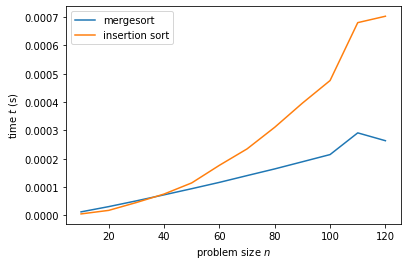

In [9]:
def insertion_sort(array):
  """Sort a list via insertion sort.

  Args:
    array: Unsorted list.

  Returns:
    A new list containing all elements in array, sorted.

  """
  n = len(array)
  result = array.copy()

  # Swap each value backwards until in correct position
  for i in range(1, n):
    j = i
    while j > 0 and result[j] < result[j - 1]:
      result[j], result[j - 1] = result[j - 1], result[j]
      j -= 1

  return result


import time
import random
import statistics

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


def time_function(function, runs=1, average=min):
  """Test the execution time of a given function.

  Args:
    function: Function to time.
    runs (int, optional): Number of runs. Defaults to 1.

  Returns:
    Function time (minimum of runs).

  """
  results = [None] * runs
  for i in range(runs):
    t0 = time.perf_counter()
    function()
    t1 = time.perf_counter()
    results[i] = t1 - t0
  
  return average(results)


# n = {10, 20, 30, ..., 120}
problem_sizes = [(i + 1) * 10 for i in range(12)]

# Lists of time results
t_mergesort = []
t_insertion_sort = []

# Number of random samples to take
rand_samples = 5

for n in problem_sizes:
  # Times recorded for this value of n
  t_n_mergesort = []
  t_n_insertion_sort = []

  for _ in range(rand_samples):
    # Random list of length n
    array = [random.random() for _ in range(n)]

    # Obtain minimum time of 10 runs for each algorithm
    runs = 10  
    t_n_mergesort.append(time_function(
        lambda: mergesort_recursive(array),
        runs))
    t_n_insertion_sort.append(time_function(
        lambda: insertion_sort(array),
        runs))
  
  # Obtain mean of random trials for this n
  t_mergesort.append(statistics.mean(t_n_mergesort))
  t_insertion_sort.append(statistics.mean(t_n_insertion_sort))

# Plot graph of times
plt.plot(problem_sizes, t_mergesort, label="mergesort")
plt.plot(problem_sizes, t_insertion_sort, label="insertion sort")
plt.legend()
plt.xlabel(r"problem size $n$")
plt.ylabel(r"time $t$ (s)")
plt.show()

You should see the quadratic curve for insertion sort as explored in the previous worksheet against a linearithmic $O(n\log{n})$ curve for mergesort. The linearithmic function is subtle: it appears almost linear, but does indeed grow faster than any linear function for arbitrarily large $n$.

You should also observe a crossing point at small values of $n$ where insertion sort appears to perform slightly faster; highlighting this effect is the reason for choosing smaller values of $n$ here. We will address this in the next section.

# ✍️ Exercise: Merge-insertion hybrid

Insertion sort is quadratic-time in the average and worst cases, whereas mergesort is linearithmic-time, making mergesort a more effective algorithm overall. However, its more complicated implementation means that insertion sort will still generally perform faster on very small arrays, as it is comparitively much more simple under the hood. Hence, we observe a crossing point in the above timing experiment.

In a situation where one algorithm performs better on one type of problem, but another performs better on a different type, a simple hybridisation can be very effective. Implement alternate versions of mergesort which delegates to insertion sort for small arrays as `mergesort_recursive_hybrid` and `mergesort_iterative_hybrid`. The threshold for which this delegation should occur can be inferred from your empirical results in the above exercise.

Hint: for the recursive version, this involves changing the base case to calling insertion sort if $n$ is less than the threshold. For the iterative version, this involves calling insertion sort on sublists of run length equal to the threshold, before then commencing as usual with run lengths of 2x the threshold, 4x the threshold, onwards.

<h2>👇</h2>

In [10]:
def mergesort_recursive_hybrid(array, threshold=37):
  """Sort a list via hybrid recursive (top-down) mergesort.

  Delegates to insertion sort when n is less than or equal to some threshold.

  Args:
    array: Unsorted list.
    threshold (int, optional): Delegation threshold. Defaults to 37.

  Returns:
    A new list containing all elements in array, sorted.

  """
  # Base case delegates to insertion sort
  n = len(array)
  if n <= threshold:
    return insertion_sort(array)

  # Recur on two halves of array and merge results
  mid = n // 2
  return merge(
    mergesort_recursive(array[:mid]),
    mergesort_recursive(array[mid:]))


def mergesort_iterative_hybrid(array, threshold=37):
  """Sort a list via hybrid iterative (bottom-up) mergesort.

  Delegates to insertion sort when n is less than or equal to some threshold.

  Args:
    array: Unsorted list.
    threshold (int, optional): Delegation threshold. Defaults to 37.

  Returns:
    A new list containing all elements in array, sorted.

  """
  n = len(array)
  result = array.copy()

  # Initial insertion sort pass
  for i in range(0, n, threshold):
    result[i:i+threshold] = insertion_sort(result[i:i+threshold])

  # Merge runs of length threshold, 2*threshold, ...
  length = threshold
  while length < n:
    # Merge each pair of runs
    for i in range(0, n, 2 * length):
      mid = i + length
      upper = i + 2 * length
      result[i:upper] = merge(result[i:mid], result[mid:upper])
    length *= 2

  return result

🟢

In [11]:
# Output should be:
# Recursive hybrid:
# [-2, 0, 4, 5, 6, 14, 21, 23, 28, 30, 31, 32, 38, 38, 39, 42, 42, 48, 49, 52,
# 52, 53, 56, 69, 75, 83, 83, 88, 95]
# Iterative hybrid:
# [-2, 0, 4, 5, 6, 14, 21, 23, 28, 30, 31, 32, 38, 38, 39, 42, 42, 48, 49, 52,
# 52, 53, 56, 69, 75, 83, 83, 88, 95]

data = [48, 38, 28, 14, 38, 56, 49, 30, 39, 0, 5, 4, 31, 88, 83, 32, 52, 42,
        83, -2, 69, 95, 75, 52, 21, 23, 53, 42, 6]
print("Recursive hybrid:")
print(mergesort_recursive_hybrid(data))
print("Iterative hybrid:")
print(mergesort_iterative_hybrid(data))

Recursive hybrid:
[-2, 0, 4, 5, 6, 14, 21, 23, 28, 30, 31, 32, 38, 38, 39, 42, 42, 48, 49, 52, 52, 53, 56, 69, 75, 83, 83, 88, 95]
Iterative hybrid:
[-2, 0, 4, 5, 6, 14, 21, 23, 28, 30, 31, 32, 38, 38, 39, 42, 42, 48, 49, 52, 52, 53, 56, 69, 75, 83, 83, 88, 95]


Finally, profile your hybrid iterative version of mergesort against the regular iterative version via the same average-case experiment.

This time, however, demonstrate the efficiency of mergesort by using a greater range of problem instance sizes: $n \in \{200,400,600,\dots,4000\}$

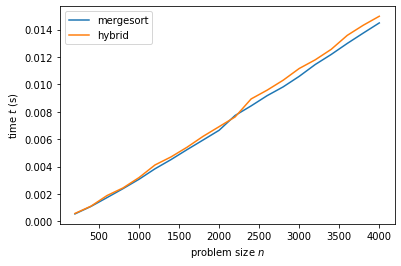

In [12]:
import time
import random
import statistics

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


def time_function(function, runs=1, average=min):
  """Test the execution time of a given function.

  Args:
    function: Function to time.
    runs (int, optional): Number of runs. Defaults to 1.

  Returns:
    Function time (minimum of runs).

  """
  results = [None] * runs
  for i in range(runs):
    t0 = time.perf_counter()
    function()
    t1 = time.perf_counter()
    results[i] = t1 - t0
  
  return average(results)


# n = {200, 400, 600, ..., 4000}
problem_sizes = [(i + 1) * 200 for i in range(20)]

# Lists of time results
t_mergesort = []
t_mergesort_hybrid = []

# Number of random samples to take
rand_samples = 5

for n in problem_sizes:
  # Times recorded for this value of n
  t_n_mergesort = []
  t_n_mergesort_hybrid = []

  for _ in range(rand_samples):
    # Random list of length n
    array = [random.random() for _ in range(n)]

    # Obtain minimum time of 10 runs for each algorithm
    runs = 10  
    t_n_mergesort.append(time_function(
        lambda: mergesort_iterative(array),
        runs))
    t_n_mergesort_hybrid.append(time_function(
        lambda: mergesort_iterative_hybrid(array),
        runs))
  
  # Obtain mean of random trials for this n
  t_mergesort.append(statistics.mean(t_n_mergesort))
  t_mergesort_hybrid.append(statistics.mean(t_n_mergesort_hybrid))

# Plot graph of times
plt.plot(problem_sizes, t_mergesort, label="mergesort")
plt.plot(problem_sizes, t_mergesort_hybrid, label="hybrid")
plt.legend()
plt.xlabel(r"problem size $n$")
plt.ylabel(r"time $t$ (s)")
plt.show()

You should see that the hybrid approach consistently outperforms the regular mergesort approach.

Congratulations! You have already moved beyond mere academic exercise and just implemented a very real, practical algorithm for sorting lists. For example, many C++ compilers use this hybrid of iterative (bottom-up) mergesort and insertion sort for implementations of its standard library's `std::stable_sort` function (a stable sort is one which preserves the order of elements equal to each other as they were in the input &ndash; both mergesort and insertion sorts are stable).



# ➕ Extra: Best-case optimisation (natural mergesort)

We derived both the best-case and worst-case complexity of mergesort as $O(n\log{n})$, differing only in the exact number of comparisons needed in the merge step based on pre-existing ordering. In particular, we noted that the number of comparisons in the merge step is just $n/2$ if every element in one set is less than or greater than every element in the other.

Naturally-occurring order in the input data forming the best case can actually be exploited further. Firstly, remember that each subset is *itself already sorted*. Take an example of a best case for $n$ values, where every element of $A$ is less than every element of $B$:

| $A$ | $B$ |
| :-: | :-: |
| $1, 2, 3$ | $4, 5, 6$ |

As we have implemented it so far, mergesort would take $n/2=3$ comparisons to merge $A$ and $B$. However, we can detect this best case by noting that the last element of $A$ is less than the first element of $B$, because we know that both sets are already sorted. By adding this single check to the algorithm, the merge step now only takes 1 comparison in the best case.

The best-case complexity now becomes linear-time, as opposed to linearithmic-time:

\begin{align}
T(n) &= 2T{\left(\frac{n}{2}\right)} + 1 \\
&= 4T{\left(\frac{n}{4}\right)} + 2 + 1 \\
&= 8T{\left(\frac{n}{8}\right)} + 4 + 2 + 1 \\
&\;\;\vdots \\
&= 2^kT{\left(\frac{n}{2^k}\right)} + 2^0 + 2^1 + \dots + 2^{k-1} \\
&= 2^kT{\left(\frac{n}{2^k}\right)} + 2^k - 1 \\
&= nT(1) + n - 1 \\
&= n - 1 \\
\therefore \quad T(n) &= O(n)
\end{align}

Therefore, natural mergesort improves the best case to $O(n)$ at the cost of one extra comparison per merge step in the worst case. To detect the equally-good best case where the roles of $A$ and $B$ are swapped, e.g.

| $A$ | $B$ |
| :-: | :-: |
| $4, 5, 6$ | $1, 2, 3$ |

another comparison, this time between the first element of $A$ and the last element of $B$, can also be added. This extends the achieving of $O(n)$ at the cost of only two extra comparisons per merge step in the worst case. Exploitation of naturally-occurring ordering is a powerful ability and forms the basis of more complicated and sophisticated sorting algorithms such as Timsort.